In [412]:
#initialzing the libraries required.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [413]:
#loading the dataset.
%cd C:\Users\Nischay\Downloads\Data Sets\Big mart sales
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

C:\Users\Nischay\Downloads\Data Sets\Big mart sales


In [414]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [415]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [416]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# 01. Explanatory Data Analysis.

In [417]:
#checking for duplicates.
idsunique=len(set(train.Item_Identifier))
idstotal=train.shape[0]
idsdupli=idstotal-idsunique
print("There are "  + str(idsdupli)  +  " duplicate IDs for "  +  str(idstotal) + " total entries. ")

There are 6964 duplicate IDs for 8523 total entries. 


1.Univariate Analysis.
--

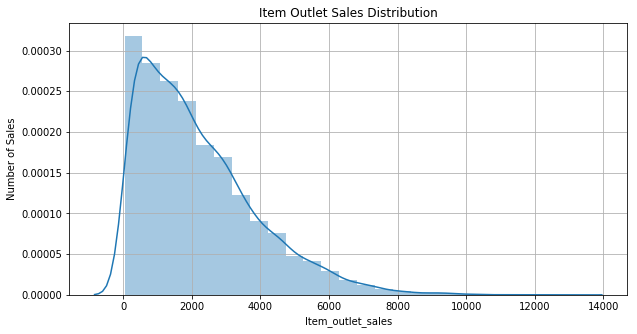

In [418]:
#item outlet sales.
plt.figure(figsize=(10,5))
sns.distplot(train['Item_Outlet_Sales'],bins=25)
plt.xlabel('Item_outlet_sales')
plt.ylabel('Number of Sales')
plt.title('Item Outlet Sales Distribution')
plt.grid()

In [419]:
#the distribution is right skewed.
print('Skew is:', train.Item_Outlet_Sales.skew())
print('Kurtosis :' , train.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542798
Kurtosis : 1.6158766814287264


1.1.Numeric Predictors.
--

In [420]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [421]:
#correltion between target and predictor varibales.
corr=numeric_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [422]:
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


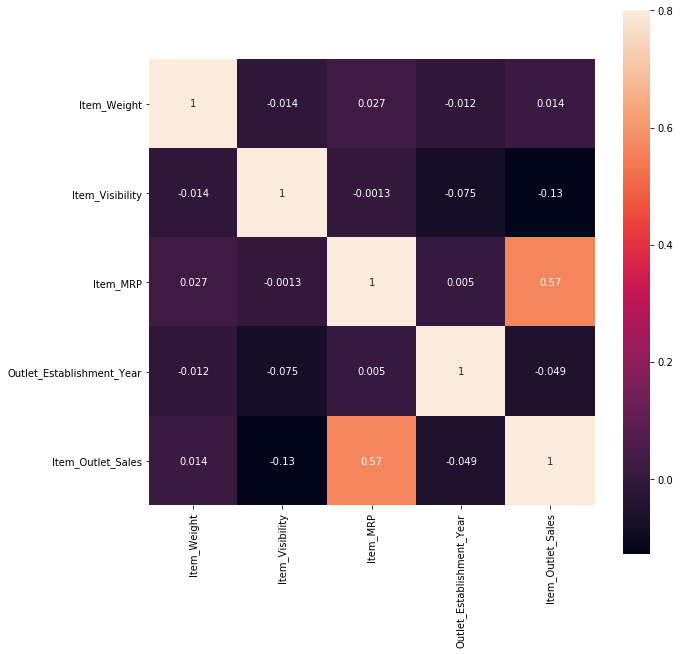

In [423]:
#correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=.8, square=True, annot=True)

* As you can see the Item_visibility features is the lowest correlated with the Item_Outlet_sale.Less the item visibility in a outlet store more will be the price of that particular item.

* Further Item_MRP has the most positive correlation with the Item_Sales_Outlet.


1.2.Categorical Predictor
--


In [424]:
cate_features=train.select_dtypes(include=object)
cate_features.dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

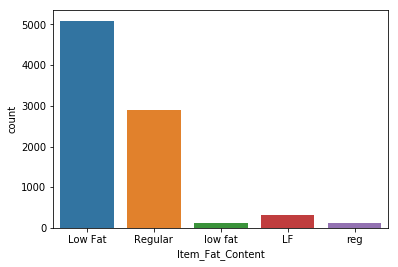

In [425]:
#Item_Fat_Content
sns.countplot(train.Item_Fat_Content)

* As we can see there two types of low fat written in differnt manner such as Low Fat, LF and low fat which can be combined as category.
* Similarly there are Regukar and reg which can be combined as one category.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

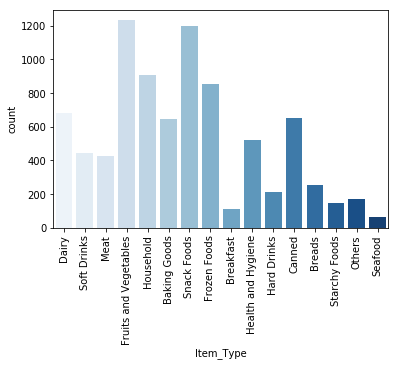

In [426]:
#Item_type
sns.countplot(train.Item_Type, palette ='Blues')
plt.xticks(rotation=90)

* There are 16 different types of unique categories in Item_Type, these number has to be reduced.

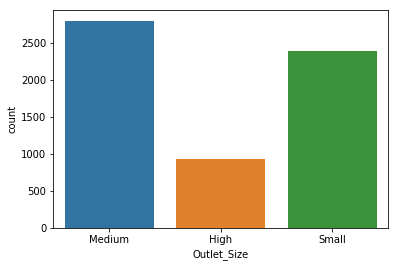

In [427]:
#Outlet sales
sns.countplot(train.Outlet_Size)

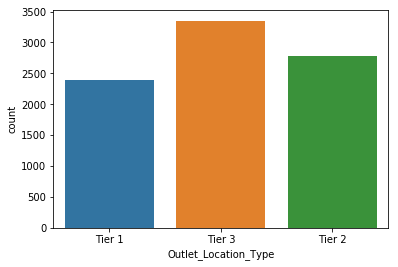

In [428]:
#Outlet loaction type
sns.countplot(train.Outlet_Location_Type)

* It appears the mart has more stores in medium and small size cities than is more populated cities.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

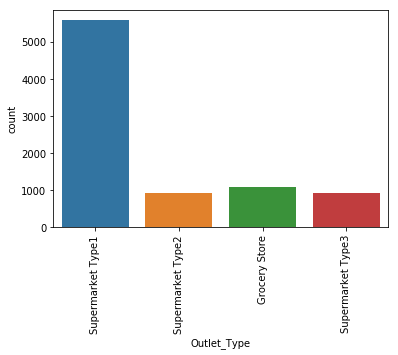

In [429]:
#Outlet Type
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

* It appears Supermarket Type2, Type3 and Grocery Store all have low distribution they can be made to sinlge category further.

2.Bivariate Analysis.
--

* To understand the relationship between target varaible and Predictors.

2.1.Numeric Predictors.
--

In [430]:
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

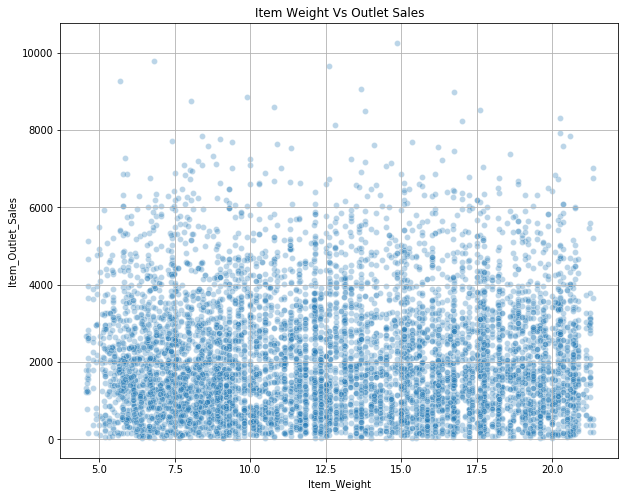

In [431]:
#Item weight and Item Outlet Sales
plt.figure(figsize=(10,8))
sns.scatterplot(x=train.Item_Weight,y=train.Item_Outlet_Sales ,alpha=0.3)
plt.title('Item Weight Vs Outlet Sales')
plt.grid()

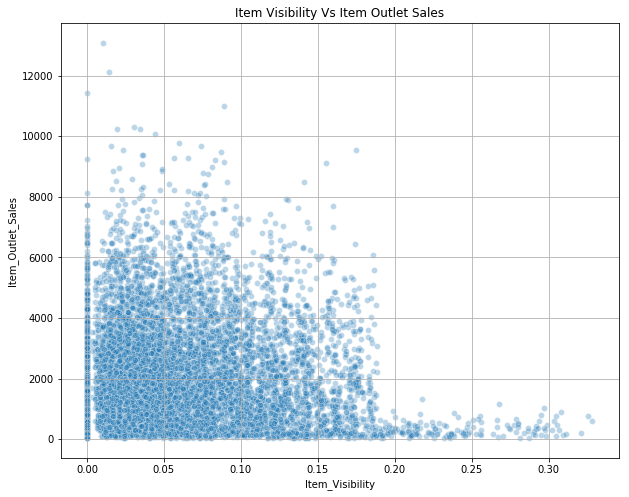

In [432]:
#Item Visiblity vs Item Outlet Sales
plt.figure(figsize=(10,8))
sns.scatterplot(x=train.Item_Visibility,y=train.Item_Outlet_Sales,alpha=0.3)
plt.title('Item Visibility Vs Item Outlet Sales')
plt.grid()


* As we all assume the more visible a product is more it is sold.But looking at the corraltion and the plot above it appears thats not the trend.
Daily use products even though not that visible will always top the list.

Text(0.5,1,'Impact of Item Type on Item Outlet Sales')

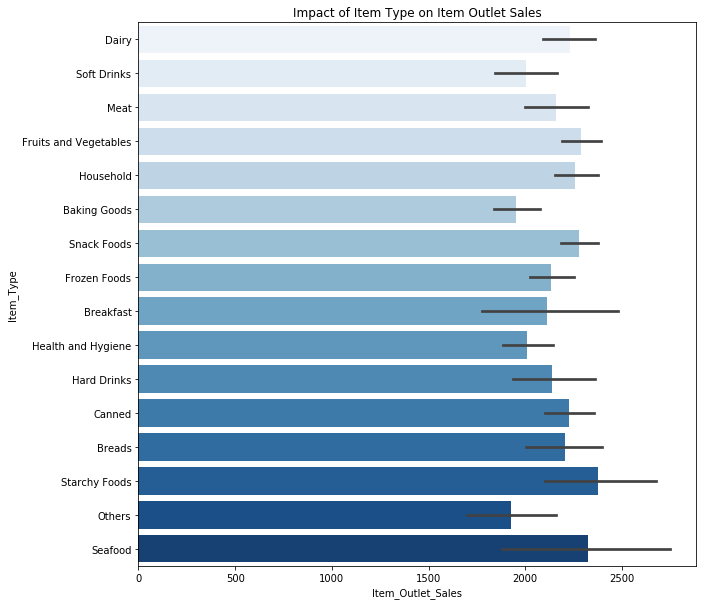

In [433]:
#Item type impact on  Outlet Sales
plt.figure(figsize=(10,10))
sns.barplot(y=train.Item_Type,x=train.Item_Outlet_Sales,palette='Blues')
plt.title('Impact of Item Type on Item Outlet Sales')

Text(0.5,1,'Item Type Impact on Item Visibility')

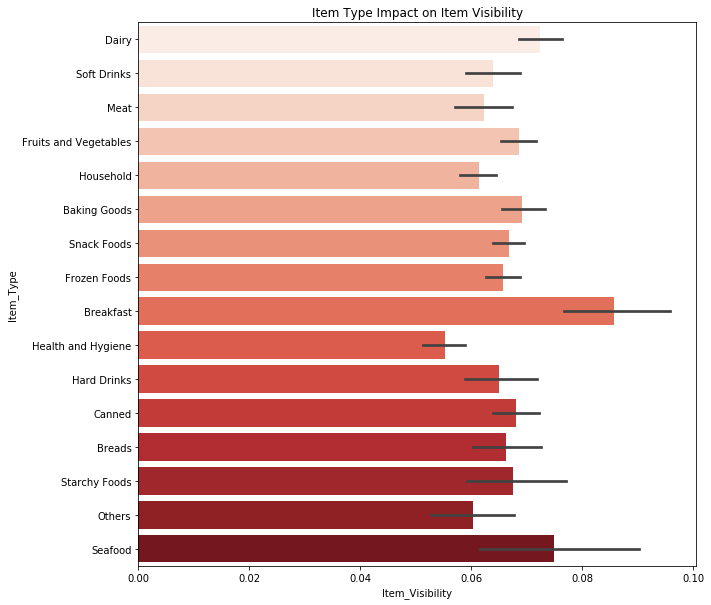

In [434]:
#Item type impact on Item visiblity.
plt.figure(figsize=(10,10))
sns.barplot(y=train.Item_Type,x=train.Item_Visibility,palette='Reds')
plt.title('Item Type Impact on Item Visibility')

Text(0.5,1,'Impact of Outlet Establishment Year on Item Outlet Sales')

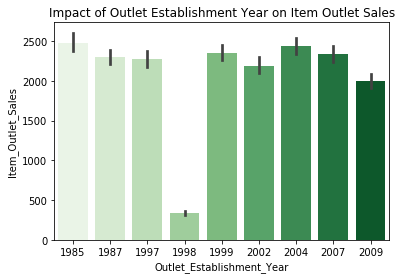

In [435]:
#Outlet Sales vs Establishmeant Year.
sns.barplot(x=train.Outlet_Establishment_Year,y=train.Item_Outlet_Sales,palette='Greens')
plt.title('Impact of Outlet Establishment Year on Item Outlet Sales')

* Green=Money
* As you can see ther is no such observatible pattern.

2.2.Categorical Varibales
--

Text(0.5,1,'Impact of Item Fat Content on Item Outlet Sales')

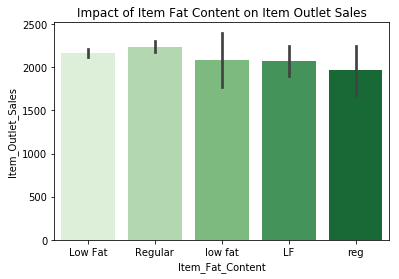

In [436]:
#item fat content vs outlet sales
sns.barplot(x=train.Item_Fat_Content,y=train.Item_Outlet_Sales,palette='Greens')
plt.title('Impact of Item Fat Content on Item Outlet Sales')

Text(0.5,1,'Impact of Outlet Identifier on Item Oulet sales')

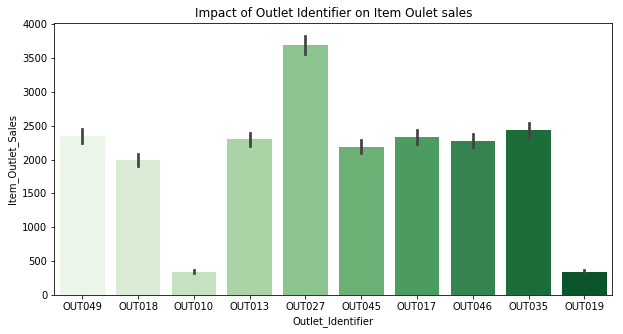

In [437]:
#outlet identifier vs item oulet sales
plt.figure(figsize=(10,5))
sns.barplot(x=train.Outlet_Identifier,y=train.Item_Outlet_Sales, palette = 'Greens')
plt.title('Impact of Outlet Identifier on Item Oulet sales')

In [438]:
#type of outlet in each oulet identifier.
train.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


* As we can see from th above plot 'OUT010','OUT019' have least sales they are of Outlet type 'Grocery Store'.
* Off the ten Outlet stores there are two 'Grocery stores', six 'Supermarket type1' and one each of 'Supermarket type2' and 'Supermarket type3'.
* The best result belong to 'OUT027' which is a 'Medium' size 'Supermarket Type3'.

In [439]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Size', aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


Text(0.5,1,'Impact of Outlet Location on Item Outlet sales')

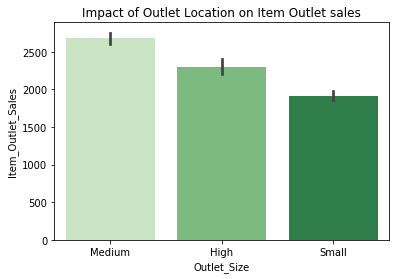

In [440]:
#Outlet size vs Item Outlet sales
sns.barplot(x=train.Outlet_Size,y=train.Item_Outlet_Sales,palette='Greens')
plt.title('Impact of Outlet Location on Item Outlet sales')

* Even though it is always the case that stores that are big is size would make more sales.
* According to the results the 'Medium'size stores are making more sales than the 'High' and 'Small' sized stores.

Text(0.5,1,'Impact of Outlet Type on Item Outlet sales')

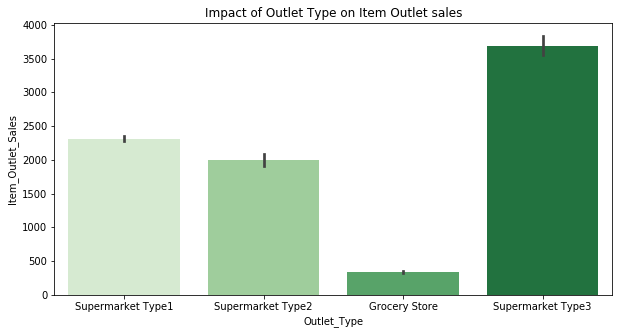

In [441]:
#Outlet Location type vs Item outlet type
plt.figure(figsize=(10,5))
sns.barplot(x=train.Outlet_Type,y=train.Item_Outlet_Sales, palette='Greens')
plt.title('Impact of Outlet Type on Item Outlet sales')

Text(0.5,1,'Impact of Outlet Location Type on Item Outlet sales')

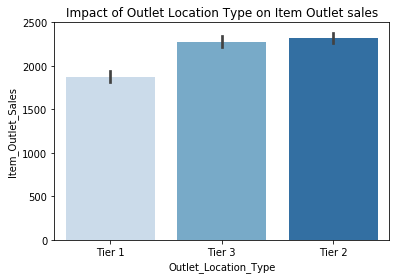

In [442]:
#Outlet loaction vs Item Outlet Sales
sns.barplot(x=train.Outlet_Location_Type, y=train.Item_Outlet_Sales, palette='Blues')
plt.title('Impact of Outlet Location Type on Item Outlet sales')

In [443]:
train.pivot_table(values='Outlet_Location_Type', columns='Outlet_Type',aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


* From the results we can say that 'Tier2' cities have more sales , then followed by 'Tier3' and the least sales in 'Tier1' of the three type of locations.

# 02. Data Pre-Processing.

* Regarding the variables which were thought to have high impact on the product’s sale price. 'Item_Visibility' does not have a high positive correlation as expected, quite the opposite. As well, there are no big variations in the sales due to theItem_Type . On the other hand, it was possible to see that the size, location and type of store could have a positive impact on sales.
* If we look at variable 'Item_Identifer' , we can see different groups of letters per each product such as ‘FD’ (Food), ‘DR’(Drinks) and ‘NC’ (Non-Consumable). From this we can create a new variable.
*Regarding 'Item_Visibility' there are items with the value zero. This does not make lot of sense, since this is indicating those items are not visible on the store.
*Similar, 'Item_Weight' and 'Outlet_Size' seem to present NaN values.
*There seems to be 1562 unique items only available in a single store.
* 'Outlet_Establishment_Year' besides being a hidden category, its values vary from 1985 to 2009 . It must be converted to how old the store is to better see the impact on sales.

1.Missing Values.
--

In [444]:
#join both train and test.
train['source']='train'
test['source']='test'
data=pd.concat([train,test], ignore_index=True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [445]:
#percentage of null values.
data.isnull().sum()/len(data)*100

Item_Fat_Content              0.000000
Item_Identifier               0.000000
Item_MRP                      0.000000
Item_Outlet_Sales            39.995776
Item_Type                     0.000000
Item_Visibility               0.000000
Item_Weight                  17.171219
Outlet_Establishment_Year     0.000000
Outlet_Identifier             0.000000
Outlet_Location_Type          0.000000
Outlet_Size                  28.273726
Outlet_Type                   0.000000
source                        0.000000
dtype: float64

* 'Item_Outlet_Sales' which is the target variable is 39% of its values are NAN, which belong to the test dataset.
* We will impute the missing values of 'Item_Weight' and 'Outlet_Size'

2.Imputing the missing values.
--

In [446]:
#item weight , using mean value.
mean_weight=data.Item_Weight.mean()
data['Item_Weight']=data.Item_Weight.fillna(mean_weight)

In [447]:
data.Item_Weight.isnull().sum()

0

* So now there are no NAN in 'Item_Weight'.

In [448]:
#Outlet Size, using mode method
from scipy.stats import mode
size_mode=data.pivot_table(values='Outlet_Size',columns='Outlet_Type', aggfunc=lambda x:x.mode())
size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [449]:
def size_modes(cols):
    Size=cols[0]
    Type=cols[1]
    if pd.isnull(Size):
        return size_mode.loc['Outlet_Size'][size_mode.columns==Type][0]
    else:
        return Size
    
data['Outlet_Size']=data[['Outlet_Size','Outlet_Type']].apply(size_modes, axis=1)

In [450]:
data['Outlet_Size'].isnull().sum()

0

In [451]:
data.isnull().sum()/len(data)*100

Item_Fat_Content              0.000000
Item_Identifier               0.000000
Item_MRP                      0.000000
Item_Outlet_Sales            39.995776
Item_Type                     0.000000
Item_Visibility               0.000000
Item_Weight                   0.000000
Outlet_Establishment_Year     0.000000
Outlet_Identifier             0.000000
Outlet_Location_Type          0.000000
Outlet_Size                   0.000000
Outlet_Type                   0.000000
source                        0.000000
dtype: float64

* As you can see all the missing values have been taken care.

# 03. Feature Engineering.

* This set involves creation of new features from the existing or any changes required to the existing features.

Outlet Type.
--

In [452]:
#Outlet Type. Agg function is by default mean()
data.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


* Since there is significant difference in average product sales, so Type2 and Type3 Supermarket cannot be combined.

Item Visibility
--

In [453]:
#Item Visiblity
data['Item_Visibility']=data['Item_Visibility'].replace(0.0,np.nan)
item_visible=data['Item_Visibility'].dropna().mean()
item_visible

0.07030343626048803

In [454]:
data['Item_Visibility']=data['Item_Visibility'].fillna(item_visible)
data['Item_Visibility'].head()

0    0.016047
1    0.019278
2    0.016760
3    0.070303
4    0.070303
Name: Item_Visibility, dtype: float64

* As we know earlier we had a concern that minimum of 'Item_Visibility' was Zero.
* Now we have replaced it with the mean value.

Outlet Year
--

In [455]:
#Outlet Year.Since data is from 2013
data['Outlet_Years']=2013-data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

* Here we have created a seperate column 'Outlet_Year' which years since it established till 2013.


* We have replaced 'LF', 'low fat' as'Low Fat' and 'reg' as 'Regular', making it to only two categories 'Low Fat' and 'Regular'.

Item Type.
--

In [456]:
#Item Type
data['Item_Type_Combined']=data['Item_Identifier'].apply(lambda x:x[0:2])
data['Item_Type_Combined']=data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

* Since we have 16 categories in 'Item_Type' it does help for any analysis.So, since in the 'Item_Identifier' we have label suach as 'FD', 'NC', and'DR'.

Item Fat Content.
--

In [457]:
# Item Fat Content
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [458]:
#non_consumables as separate category in low_fat.
data.loc[data['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content']='Non-Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

* Here we have added another catrgory in 'Item_Fat_Content' as Non-Edibles which consists of items from 'Item_Type' which are 'Non-Consumable'.

# 04. Feature Transformations.

Categorical Variables-One hot Encoding.
--

In [459]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

var_mod=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type']
for i in var_mod:
    data[i]=le.fit_transform(data[i])

In [460]:
#Dummy Variables:
data = pd.get_dummies(data, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined'])
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
dtype: object

Exporting Data.
--

* Final step split data back to train and test data sets.
* It is good to save the train and test as csv files.

In [461]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)